Import needed libraries

In [1]:
import mapper
import numpy as np
import matplotlib.pyplot as plt

Using cmappertools v1.0.24.


<b>Step 1: Input data</b><br>
    Load the circle data set, circle = $x^2 + y^2 = 1$

In [2]:
data = mapper.shapes.circle(samples=1000)

Run the following without modification, just preprocessing some variables

In [3]:
# Preprocessing
point_labels = None
mask = None
Gauss_density = mapper.filters.Gauss_density
kNN_distance  = mapper.filters.kNN_distance
crop = mapper.crop
# Custom preprocessing code

# End custom preprocessing code
data, point_labels = mapper.mask_data(data, mask, point_labels)


<b>Step 2: Choose metric </b><br>
Below we are choosing to use the Euclidean metric

In [4]:
intrinsic_metric = False
if intrinsic_metric:
    is_vector_data = data.ndim != 1
    if is_vector_data:
        metric = Euclidean            # here we choose Euclidean metric
        if metric != 'Euclidean':
            raise ValueError('Not implemented')
    data = mapper.metric.intrinsic_metric(data, k=1, eps=1.0)
is_vector_data = data.ndim != 1


<b>Step 3: Choose Filter function</b><br>
Below we are choosing to use projection to first principal component

In [5]:
if is_vector_data:
    metricpar = {'metric': 'euclidean'}
    f = mapper.filters.dm_eigenvector(data,
        metricpar=metricpar,
        k=0, mean_center=True)
else:
    f = mapper.filters.dm_eigenvector(data,
        k=0, mean_center=True)
mask = None
crop = mapper.crop

Eigenvalues:
[-440.63551908]


<b>Step 4: Select more Mapper parameters</b>
Below we choose to use 15 intervals with 50% overlap

In [6]:
cover = mapper.cover.cube_cover_primitive(intervals=15, overlap=50.0)

Below we choose to use single linkage clustering

In [7]:
cluster = mapper.single_linkage()

Run the following without modification to run mapper algorithm

In [8]:
if not is_vector_data:
    metricpar = {}
mapper_output = mapper.mapper(data, f,
    cover=cover,
    cluster=cluster,
    point_labels=point_labels,
    cutoff=None,
    metricpar=metricpar)
cutoff = mapper.cutoff.first_gap(gap=0.1)
mapper_output.cutoff(cutoff, f, cover=cover, simple=False)
# mapper_output.draw_scale_graph()
# plt.savefig('scale_graph.pdf')
# plt.show()

Number of CPU cores present: 8
Start Mapper thread.
Start Mapper thread.
Start Mapper thread.
Start Mapper thread.
Start Mapper thread.
Start Mapper thread.
Start Mapper thread.
Start Mapper thread.
Mapper: Filter range in dimension 0: [-0.04, 0.04]
Mapper: Cover: Hypercube cover. Intervals: (15,). Overlap: (50.0,)
Mapper: Clustering: Single linkage clustering
Mapper: Cutoff: None
Level: (0,)
Level: (1,)
Level: (2,)
Level: (3,)
Level: (4,)
Level: (5,)
Level: (6,)
Level: (7,)
Level: (8,)
Level: (9,)
Level: (10,)
Level: (11,)
Level: (12,)
Level: (13,)
Level: (14,)Filter level (5,) has 76 points.Filter level (3,) has 77 points.
Filter level (4,) has 80 points.Filter level (6,) has 78 points.
Filter level (2,) has 85 points.

Filter level (0,) has 257 points.Filter level (1,) has 134 points.

Filter level (7,) has 85 points.


Filter level (8,) has 81 points.
Filter level (9,) has 78 points.
Filter level (10,) has 79 points.Filter level (12,) has 103 points.
Filter level (14,) has 237 poin

<b>Step 5: Choose display parameters</b><br>
Choose how to color the vertices (nodes) in mapper output

In [9]:
nodes = mapper_output.nodes
node_color = None
point_color = data[:,0]       # coloring nodes in mapper output using average of first coordinate
name = 'custom scheme'
node_color = mapper_output.postprocess_node_color(node_color, point_color, point_labels)

<b>Step 6:  Output</b><br>
Draw TDA mapper graph

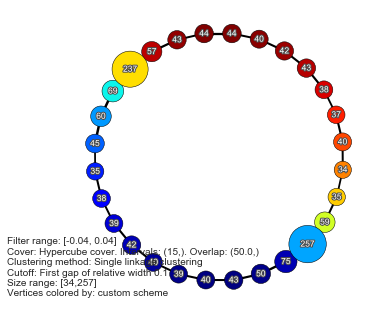

In [10]:
minsizes = []
mapper_output.draw_2D(minsizes=minsizes,
    node_color=node_color,
    node_color_scheme=name)
plt.savefig('mapper_output.pdf')
plt.show()